In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/My Drive/Dataset.zip'

Archive:  /content/drive/My Drive/Dataset.zip
replace Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/.DS_Store       
  inflating: Dataset/test/.DS_Store  
  inflating: Dataset/test/1051.png   
  inflating: Dataset/test/1052.png   
  inflating: Dataset/test/4043.png   
  inflating: Dataset/test/4050.png   
  inflating: Dataset/test/4051.png   
  inflating: Dataset/test/4052.png   
  inflating: Dataset/test/6052.png   
  inflating: Dataset/test/6053.png   
  inflating: Dataset/test/C052.png   
  inflating: Dataset/test/C053.png   
  inflating: Dataset/test/Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png  
  inflating: Dataset/test/Test_original_1052.png_22a82512-5b1f-4072-a4af-9a8af40653f0.png  
  inflating: Dataset/test/Test_original_1052.png_b95bc311-bae0-48a7-8b9f-d0eddf1ddf2b.png  
  inflating: Dataset/test/Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png  
  inflating: Dataset/test/Test_original_4043.png_fffcbc29-3aff-

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.utils import Sequence
import math
import cv2
import os

Using TensorFlow backend.


In [4]:
train_data_dir = "/content/Dataset/train"
categories = ["category 1","category 2","category 3","category 4"]
images = []
labels = []
IMG_SIZE = 50

training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(train_data_dir,category)
        class_num = categories.index(category)
        labels.append(class_num)
        for img in os.listdir(path): 
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
            #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            images.append(img_array)  
            training_data.append([img_array, class_num])
create_training_data()
print("training_data = ",len(training_data))
print("images",len(images))
print("labels",len(labels))

training_data =  441
images 441
labels 4


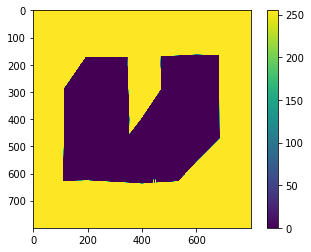

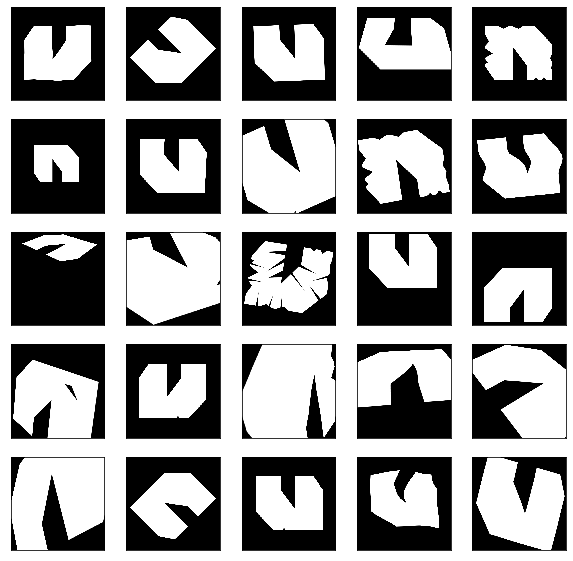

In [5]:
train_images = images
train_labels = labels

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_num[train_labels[i]])
plt.show()

In [6]:
test_data_dir = "/content/Dataset/test"
#categories = [""]
images = []
labels = []
IMG_SIZE = 50

testing_data = []

def create_testing_data():
  path = os.path.join(test_data_dir)
  for img in os.listdir(path): 
      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
      images.append(img_array)  
      testing_data.append([img_array])
create_testing_data()
print("testing_data = ",len(testing_data))
print("images",len(images))
print("labels",len(labels))

testing_data =  31
images 31
labels 0


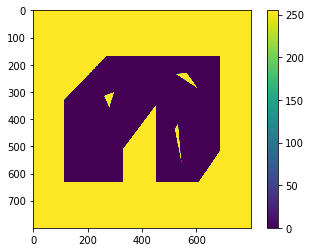

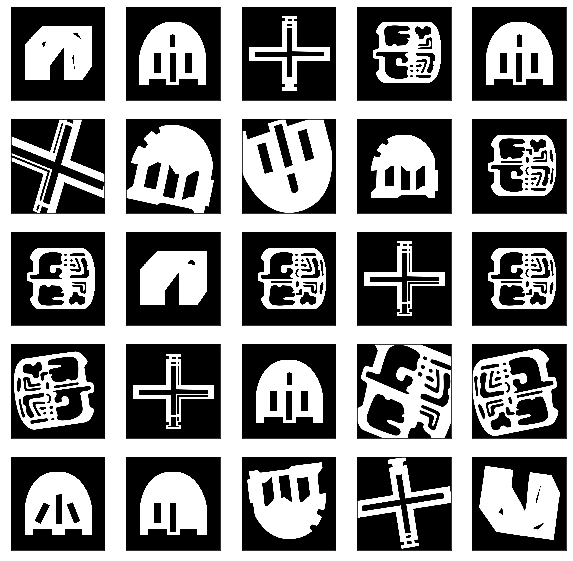

In [7]:
test_images = images
test_labels = labels

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  from ipykernel import kernelapp as app


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)

Found 440 images belonging to 4 classes.
Found 0 images belonging to 0 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=25, validation_steps=2000)`


Epoch 1/25





250/250 [==============================] - 74s 298ms/step - loss: nan - acc: 0.2416
Epoch 2/25
250/250 [==============================] - 73s 293ms/step - loss: nan - acc: 0.2430
Epoch 3/25
250/250 [==============================] - 73s 292ms/step - loss: nan - acc: 0.2433
Epoch 4/25
250/250 [==============================] - 73s 291ms/step - loss: nan - acc: 0.2436
Epoch 5/25
250/250 [==============================] - 72s 289ms/step - loss: nan - acc: 0.2435
Epoch 6/25
250/250 [==============================] - 73s 291ms/step - loss: nan - acc: 0.2423
Epoch 7/25
250/250 [==============================] - 73s 290ms/step - loss: nan - acc: 0.2447
Epoch 8/25
250/250 [==============================] - 72s 290ms/step - loss: nan - acc: 0.2441
Epoch 9/25
250/250 [==============================] - 73s 291ms/step - loss: nan - acc: 0.2421
Epoch 10/25
250/250 [==============================] - 72s 289ms/step - loss: nan - acc: 0.2440
Epoch 11/25
250/250 [=======================